# Installations and Imports

In [130]:
pip install eli5

You should consider upgrading via the '/Users/aryashrinu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install imblearn

You should consider upgrading via the '/Users/aryashrinu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [132]:
# Importing required libraries

import pandas as pd
import missingno as msno
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
import time

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier



warnings.filterwarnings("ignore")

# Feature Exploration

In [133]:
# Viewing training ans testing dataset

train_data = pd.read_csv('/Users/aryashrinu/Desktop/weather_aus_training_data.csv')
train_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,12/6/08,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,12/7/08,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,12/8/08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,12/9/08,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,12/10/08,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [134]:
# Analyzing feature categories

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109641 entries, 0 to 109640
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           109641 non-null  object 
 1   Location       109641 non-null  object 
 2   MinTemp        109120 non-null  float64
 3   MaxTemp        109401 non-null  float64
 4   Rainfall       108552 non-null  float64
 5   Evaporation    64238 non-null   float64
 6   Sunshine       59817 non-null   float64
 7   WindGustDir    102101 non-null  object 
 8   WindGustSpeed  102156 non-null  float64
 9   WindDir9am     101715 non-null  object 
 10  WindDir3pm     106927 non-null  object 
 11  WindSpeed9am   108459 non-null  float64
 12  WindSpeed3pm   107885 non-null  float64
 13  Humidity9am    108482 non-null  float64
 14  Humidity3pm    107606 non-null  float64
 15  Pressure9am    98777 non-null   float64
 16  Pressure3pm    98822 non-null   float64
 17  Cloud9am       68957 non-null

## Findings:

### From the above, there is a mixture of categorical and numerical features. 

### Categorical features have the datatype as object and numerical features have the datatype as float64. 

### We see some of the features have missing values in the dataset.

In [135]:
# Viewing statistical properties of all features 

train_data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,109641,109641,109120.000000,109401.000000,108552.000000,64238.000000,59817.000000,102101,102156.000000,101715,...,107606.000000,98777.000000,98822.000000,68957.000000,67120.000000,108943.000000,108115.000000,108552,109641.000000,109641
unique,2735,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,8/29/13,Canberra,NaN,NaN,NaN,NaN,NaN,SE,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,2718,NaN,NaN,NaN,NaN,NaN,7338,NaN,8573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84561,NaN,85336
mean,NaN,NaN,12.269056,23.325253,2.338656,5.449992,7.625088,NaN,39.967276,NaN,...,51.391428,1017.756512,1015.368863,4.391084,4.453159,17.055043,21.801296,NaN,2.348823,NaN
std,NaN,NaN,6.396149,7.129078,8.472995,4.143162,3.801504,NaN,13.523854,NaN,...,20.845954,7.135869,7.072839,2.879251,2.712643,6.499561,6.959340,NaN,8.490714,NaN
min,NaN,NaN,-8.500000,-4.100000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,980.500000,979.000000,0.000000,0.000000,-6.200000,-5.100000,NaN,0.000000,NaN
25%,NaN,NaN,7.700000,18.000000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,36.000000,1012.900000,1010.500000,1.000000,2.000000,12.400000,16.700000,NaN,0.000000,NaN
50%,NaN,NaN,12.100000,22.700000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.800000,21.200000,NaN,0.000000,NaN
75%,NaN,NaN,16.900000,28.400000,0.600000,7.400000,10.700000,NaN,48.000000,NaN,...,66.000000,1022.600000,1020.200000,7.000000,7.000000,21.600000,26.500000,NaN,0.600000,NaN


No     0.778322
Yes    0.221678
Name: RainTomorrow, dtype: float64

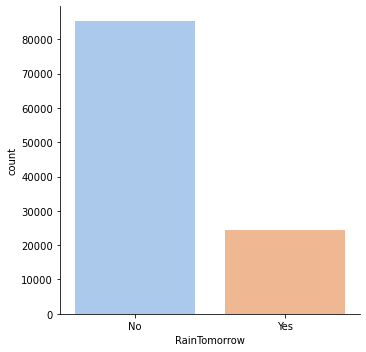

In [136]:
# Exploring and Visualizing the frequency distribution of the target variable 'RainTomorrow'

sns.catplot(x="RainTomorrow", kind="count", palette="pastel", data=train_data)
train_data['RainTomorrow'].value_counts()/len(train_data)

## Findings

### The above exploration confirms that 'No' class label occurs 77% and the 'Yes' occurs 22%.

### This indicates we are dealing with an unbalanced dataset. 

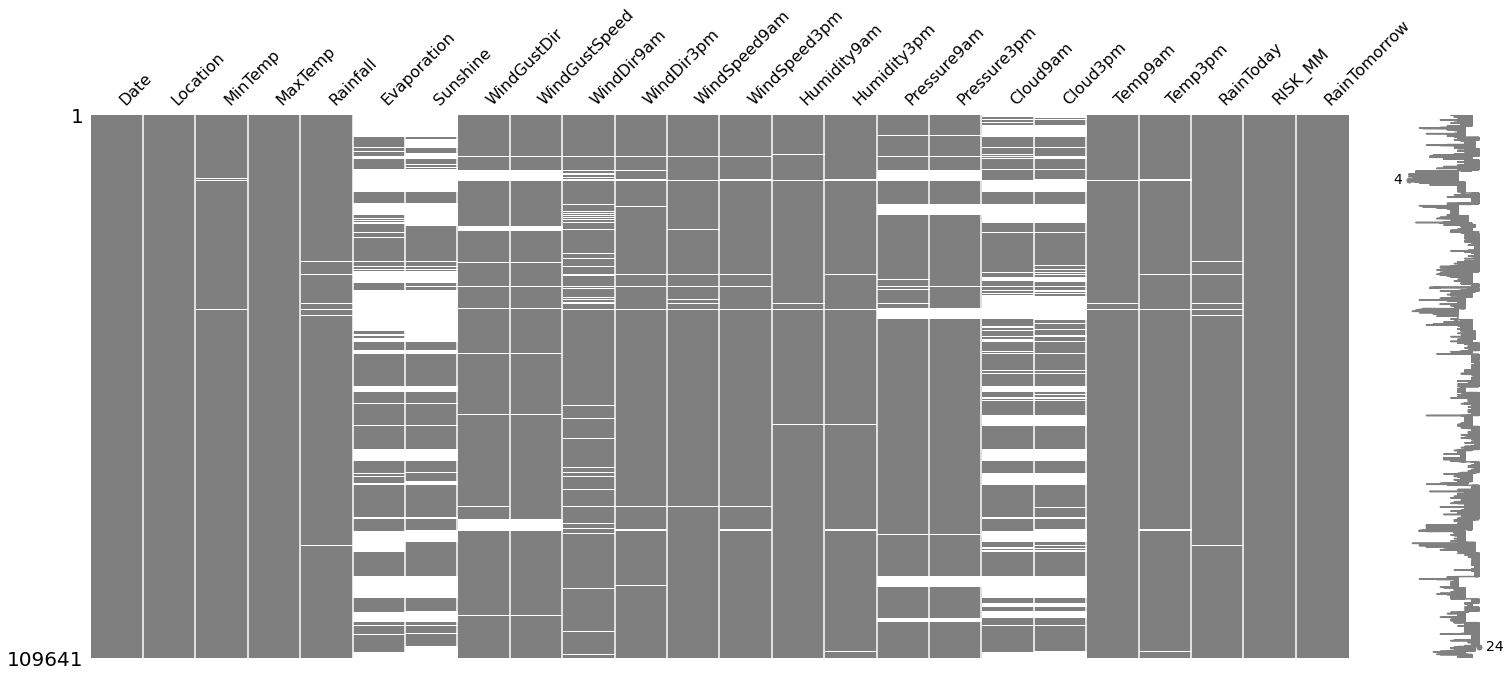

In [137]:
# Checking the missing data in the training dataset

msno.matrix(train_data,color=(0.50,0.50,0.50))

In [138]:
# Exploring missing values

total_values = train_data.isnull().sum().sort_values(ascending=False)
percentage = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_value = pd.concat([total_values, percentage], axis=1, keys=['Total_Count', 'Percent_Value'])
missing_value.head(10)


,Total_Count,Percent_Value
Sunshine,49824,0.454429
Evaporation,45403,0.414106
Cloud3pm,42521,0.387820
Cloud9am,40684,0.371066
Pressure9am,10864,0.099087
Pressure3pm,10819,0.098677
WindDir9am,7926,0.072290
WindGustDir,7540,0.068770
WindGustSpeed,7485,0.068268
WindDir3pm,2714,0.024754


# Feature Engineering

In [139]:
# "RainToday" and "RainTomorrow" features will be converted into binary (1/0)
# 1 represents "Yes"
# 0 represents "No"

train_data['RainToday'].replace({'Yes': 1, 'No': 0},inplace = True)
train_data['RainTomorrow'].replace({'Yes': 1, 'No': 0},inplace = True)

In [140]:
# Check if the text to numeric class label conversion is successful

train_data['RainTomorrow'].value_counts()/len(train_data)

0    0.778322
1    0.221678
Name: RainTomorrow, dtype: float64

In [141]:
# The next step is to compute categorical columns with mode, and transform them into numerical values.

train_data.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [142]:
# Compute categorical var with Mode

train_data['Date'] = train_data['Date'].fillna(train_data['Date'].mode()[0])
train_data['Location'] = train_data['Location'].fillna(train_data['Location'].mode()[0])
train_data['WindGustDir'] = train_data['WindGustDir'].fillna(train_data['WindGustDir'].mode()[0])
train_data['WindDir9am'] = train_data['WindDir9am'].fillna(train_data['WindDir9am'].mode()[0])
train_data['WindDir3pm'] = train_data['WindDir3pm'].fillna(train_data['WindDir3pm'].mode()[0])

In [143]:
# Convert categorical features to continuous features with Label Encoding

labelencoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    labelencoders[column] = LabelEncoder()
    train_data[column] = labelencoders[column].fit_transform(train_data[column])

In [144]:
# We will impute the missing values using mean statistical value. 

train_data.fillna(train_data.mean(), inplace=True)

NameError: name 's' is not defined

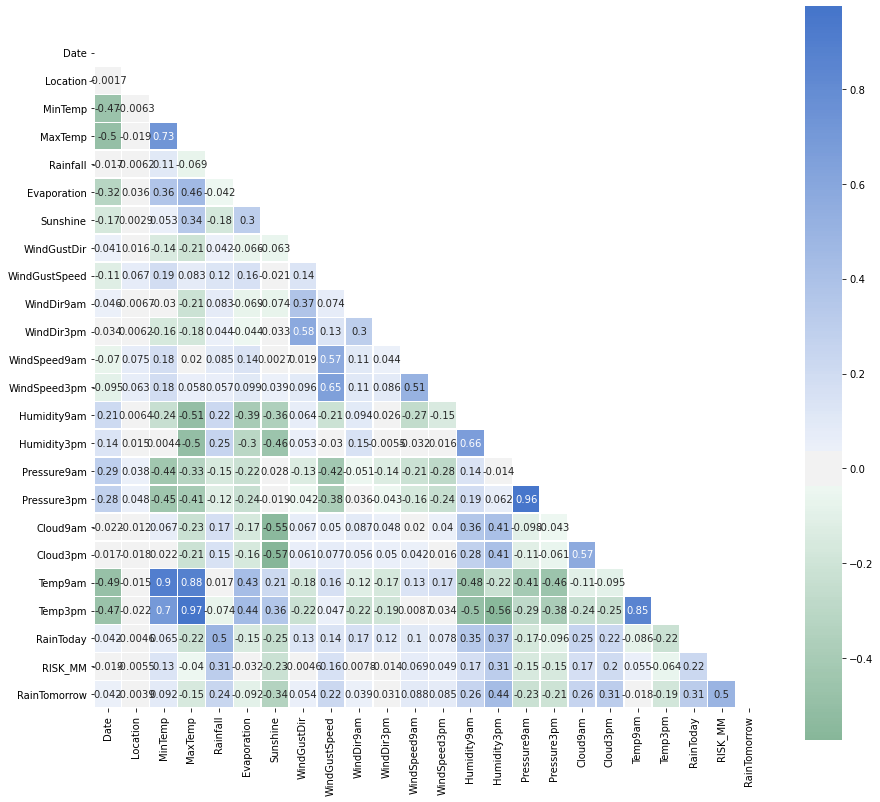

In [145]:
# Next step is to check if any feature is correlated highly with any other feature

# Correlation Heatmap

correlation = train_data.corr()
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(140, 255, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
s

## Findings

### Some of the pairs that have correlation are: Pressure9am and  Presssure3pm, Temp9am and Temp3pm, etc.

### Since none of the variables have same correlation, we are not discarding any features as every feature might add value to the training.

# Feature Selection

In [146]:
# Feature Selection by Filter Method(Chi-Square Value)

# Standardize the data using MinMaxScaler instead of StandardScaler to avoid negative values

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train_data)

train_data = pd.DataFrame(r_scaler.transform(train_data), index=train_data.index, columns=train_data.columns)

In [147]:
# Feature Importance using Filter Method (Chi-Square)

X = train_data.loc[:,train_data.columns!='RainTomorrow']
y = train_data[['RainTomorrow']]

selector = SelectKBest(chi2, k=11)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])


Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


# Model Training

In [148]:
# Ignore the 'RISK_MM' feature as it leaks the important information to the models

features = train_data[['Pressure9am', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
           'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday']]
target =   train_data['RainTomorrow']

# Split into test and train

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

print(len(X_test))
    
# Normalize Features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

27411


In [149]:
def plot_roc_curve(fpos, tpos):  
    plt.plot(fpos, tpos, color='darkorange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [150]:
def run_stats_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fpos, tpos, thresholds = roc_curve(y_test, probs) 
    plot_roc_curve(fpos, tpos)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = None)
    
    return model, accuracy, roc_auc, time_taken

In [151]:
def run_pred(model, X_test, y_test, verbose=True):
    t0=time.time()
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fpos, tpos, thresholds = roc_curve(y_test, probs) 
    plot_roc_curve(fpos, tpos)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = None)
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.8376928970121484
ROC Area under Curve = 0.7079581926003967
Time taken = 0.2905540466308594
              precision    recall  f1-score   support

         0.0    0.86234   0.94159   0.90023     21316
         1.0    0.69898   0.47432   0.56515      6095

    accuracy                        0.83769     27411
   macro avg    0.78066   0.70796   0.73269     27411
weighted avg    0.82602   0.83769   0.82572     27411



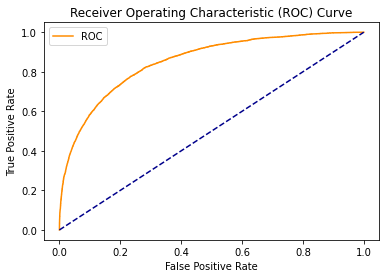

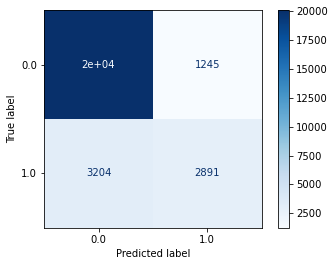

In [152]:
# Model 1 - Logistic Regression 
params_lr = {'penalty': 'l2','solver':'liblinear','multi_class':'ovr'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_stats_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8261646784137755
ROC Area under Curve = 0.6800436565230168
Time taken = 0.09011292457580566
              precision    recall  f1-score   support

         0.0    0.84978   0.94319   0.89405     21316
         1.0    0.67724   0.41690   0.51610      6095

    accuracy                        0.82616     27411
   macro avg    0.76351   0.68004   0.70507     27411
weighted avg    0.81142   0.82616   0.81001     27411



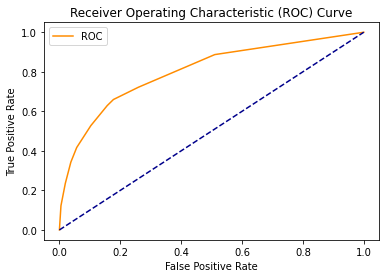

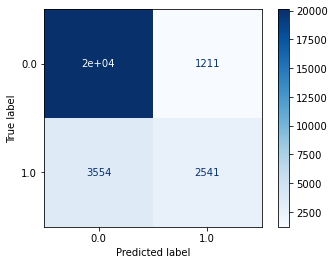

In [155]:
# Model 2 - Decision Tree

from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 32,
             'max_features': "log2",
             'max_leaf_nodes':10}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_stats_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8081062347232862
ROC Area under Curve = 0.7276549129617362
Time taken = 0.04322004318237305
              precision    recall  f1-score   support

         0.0    0.87972   0.87254   0.87611     21316
         1.0    0.56660   0.58277   0.57457      6095

    accuracy                        0.80811     27411
   macro avg    0.72316   0.72765   0.72534     27411
weighted avg    0.81009   0.80811   0.80906     27411



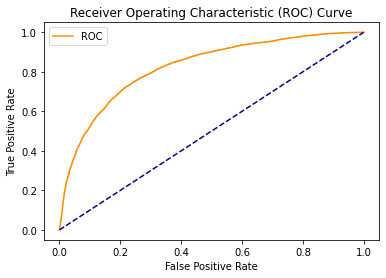

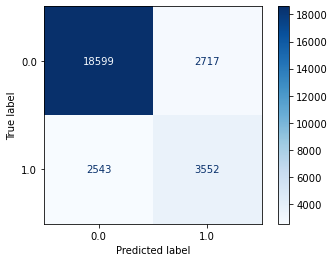

In [158]:
#Model 3 - Gaussian Naive Bayes

params_gnb = {'var_smoothing': 1e-9}
model_gnb = GaussianNB(**params_gnb)
model_gnb, accuracy_gnb, roc_auc_gnb, tt_gnb = run_stats_model(model_gnb, X_train, y_train, X_test, y_test)


Accuracy = 0.8441501586954142
ROC Area under Curve = 0.722009667873605
Time taken = 73.0018560886383
              precision    recall  f1-score   support

         0.0    0.86869   0.94197   0.90385     21316
         1.0    0.71212   0.50205   0.58891      6095

    accuracy                        0.84415     27411
   macro avg    0.79041   0.72201   0.74638     27411
weighted avg    0.83388   0.84415   0.83382     27411



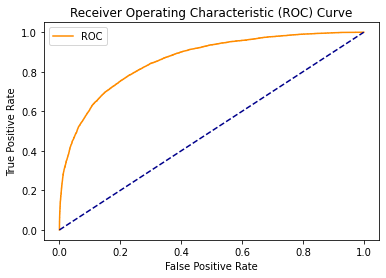

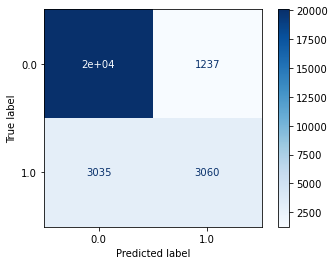

In [163]:
# Model 4 - Neural Network (Multilayer Perceptron)

from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (25,25,25),
             'activation': 'relu',
             'solver': 'lbfgs',
             'max_iter': 500,
             'batch_size' : 10}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_stats_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.836051220313013
ROC Area under Curve = 0.7078984717022696
Time taken = 1.166524887084961
              precision    recall  f1-score   support

         0.0    0.86261   0.93868   0.89904     21316
         1.0    0.68992   0.47711   0.56411      6095

    accuracy                        0.83605     27411
   macro avg    0.77626   0.70790   0.73158     27411
weighted avg    0.82421   0.83605   0.82457     27411



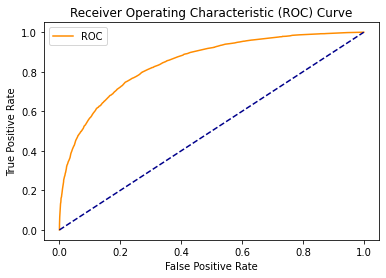

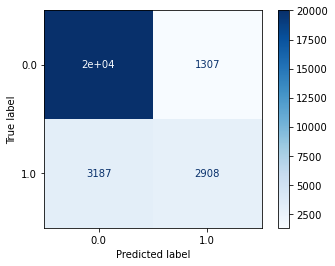

In [160]:
# Model 5 - AdaBoostClassifier

params_abc = {'n_estimators' : 20,
               'random_state' : 10
             }

model_abc = AdaBoostClassifier(**params_abc)
model_abc, accuracy_abc, roc_auc_abc, tt_abc = run_stats_model(model_abc, X_train, y_train, X_test, y_test)

In [164]:
# Applying 5 - fold cross validation for the neural network model since it has given the best accuracy of 84.593%

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_nn, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


Cross-validation scores:[0.84689286 0.84312295 0.84458227 0.85224371 0.84452146]


In [166]:
# Find the Average Cross - Validation Score for the above 
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8463


In [72]:
# From the above, Cross Validation has slightly improved the accuracy of the Neural Network(MultiLayerPerceptron) model 
# from 84.41% to 84.63%. 

In [167]:
# We are taking all the above methods into consideration for Ensemble learning since the accuracy for all the models is 
# greater than 50% (more than a coin filp)
# Trying Ensemble methods for the above classification models
# We are using soft voting method and the vote is higher for Neural Network(MultiLayerPerceptron) since it gives a 
# higher accuracy compared to other methods

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss


clf1 = LogisticRegression(random_state=12345)
clf2 = DecisionTreeClassifier(random_state=12345)
clf3 = GaussianNB()
clf4 = MLPClassifier(random_state=12345, verbose = 0)
clf5 = AdaBoostClassifier(random_state=12345)

voting_clf = VotingClassifier(estimators=[('LogisticRegression', clf1), ('DTree', clf2), ('GaussianNb', clf3), 
                                          ('MLPClassifier', clf4), ('AdaBoostClassifier', clf5)], weights=[1, 1, 1, 3, 1], voting='soft')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)
acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)

print("Accuracy is: " + str(acc))
print("F1 Score is: " + str(f1))

Accuracy is: 0.8433475611980592
F1 Score is: 0.5907357987037742


In [ ]:
# The accuracy of the Neural Network (MLP) is better compared to the ensembled output(84.33%) and other methods. So the conclusion 
# from the above is that Neural Network is the best model which has a good accuracy of 84.41% 

# Testing using safe dataset without oversampling and removing outliers

In [168]:
# Feature engineering the safe dataset

test_data = pd.read_csv('/Users/aryashrinu/Desktop/weather_aus_testing_data.csv')
test_data.head(10)

test_data['RainToday'].replace({'Yes': 1, 'No': 0},inplace = True)
test_data['RainTomorrow'].replace({'Yes': 1, 'No': 0},inplace = True)
test_data.select_dtypes(include=['object']).columns

test_data['Date'] = test_data['Date'].fillna(test_data['Date'].mode()[0])
test_data['Location'] = test_data['Location'].fillna(test_data['Location'].mode()[0])
test_data['WindGustDir'] = test_data['WindGustDir'].fillna(test_data['WindGustDir'].mode()[0])
test_data['WindDir9am'] = test_data['WindDir9am'].fillna(test_data['WindDir9am'].mode()[0])
test_data['WindDir3pm'] = test_data['WindDir3pm'].fillna(test_data['WindDir3pm'].mode()[0])    
    
labelencoders = {}
for column in test_data.select_dtypes(include=['object']).columns:
    labelencoders[column] = LabelEncoder()
    test_data[column] = labelencoders[column].fit_transform(test_data[column])
    
test_data.fillna(test_data.mean(), inplace=True)

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(test_data)

test_data = pd.DataFrame(r_scaler.transform(test_data), index=test_data.index, columns=test_data.columns)

test_features = test_data[['Pressure9am', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
           'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday']]
test_target =   test_data['RainTomorrow']


# Split into test and train

alpha, X_test, beta, y_test = train_test_split(test_features, test_target, test_size=0.99, random_state=12345)

Accuracy = 0.7674000062059764
ROC Area under Curve = 0.5002000266702227
Time taken = 0.021530866622924805
              precision    recall  f1-score   support

         0.0    0.76738   1.00000   0.86838     24728
         1.0    1.00000   0.00040   0.00080      7499

    accuracy                        0.76740     32227
   macro avg    0.88369   0.50020   0.43459     32227
weighted avg    0.82151   0.76740   0.66650     32227



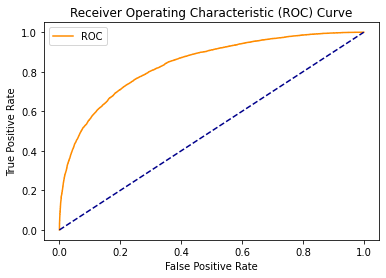

(LogisticRegression(multi_class='ovr', solver='liblinear'),
 0.7674000062059764,
 0.5002000266702227,
 0.021530866622924805)

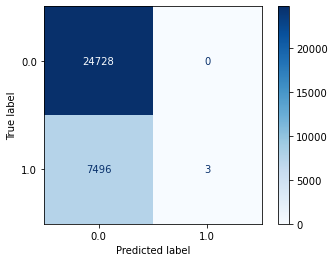

In [170]:
# Testing on model Logistic Regression

run_pred(model_lr, X_test, y_test)

Accuracy = 0.77559189499488
ROC Area under Curve = 0.5202645185000188
Time taken = 0.018312931060791016
              precision    recall  f1-score   support

         0.0    0.77463   0.99786   0.87219     24728
         1.0    0.85791   0.04267   0.08130      7499

    accuracy                        0.77559     32227
   macro avg    0.81627   0.52026   0.47674     32227
weighted avg    0.79401   0.77559   0.68815     32227



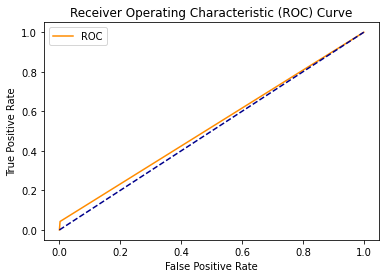

(DecisionTreeClassifier(max_depth=32, max_features='log2', max_leaf_nodes=10),
 0.77559189499488,
 0.5202645185000188,
 0.018312931060791016)

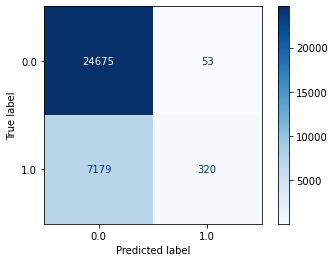

In [172]:
# Testing on model Decision Tree Classifier

run_pred(model_dt, X_test, y_test)

Accuracy = 0.76898253017656
ROC Area under Curve = 0.5036933911904312
Time taken = 0.02567291259765625
              precision    recall  f1-score   support

         0.0    0.76863   0.99992   0.86915     24728
         1.0    0.96552   0.00747   0.01482      7499

    accuracy                        0.76898     32227
   macro avg    0.86707   0.50369   0.44199     32227
weighted avg    0.81444   0.76898   0.67035     32227



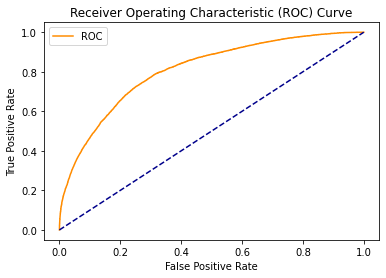

(GaussianNB(), 0.76898253017656, 0.5036933911904312, 0.02567291259765625)

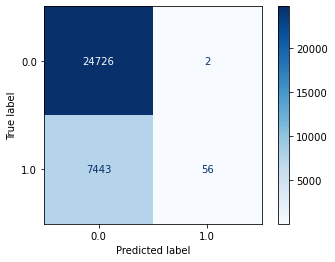

In [174]:
# Testing on model Gaussian Naive Bayes

run_pred(model_gnb, X_test, y_test)

Accuracy = 0.5036770409904738
ROC Area under Curve = 0.490758950648828
Time taken = 0.05238008499145508
              precision    recall  f1-score   support

         0.0    0.76095   0.51492   0.61422     24728
         1.0    0.22583   0.46660   0.30435      7499

    accuracy                        0.50368     32227
   macro avg    0.49339   0.49076   0.45928     32227
weighted avg    0.63643   0.50368   0.54211     32227



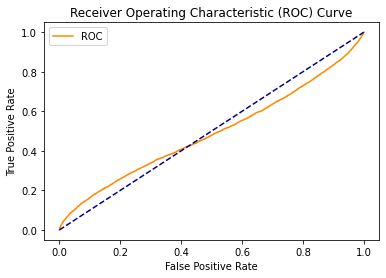

(MLPClassifier(batch_size=10, hidden_layer_sizes=(25, 25, 25), max_iter=500,
               solver='lbfgs'),
 0.5036770409904738,
 0.490758950648828,
 0.05238008499145508)

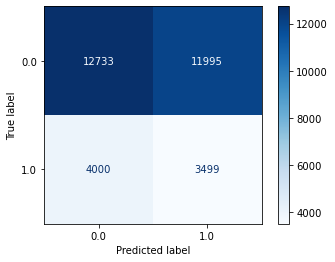

In [176]:
#Testing on model Neural Networks

run_pred(model_nn, X_test, y_test)

Accuracy = 0.7835665746113507
ROC Area under Curve = 0.5508722499137058
Time taken = 0.11942815780639648
              precision    recall  f1-score   support

         0.0    0.78618   0.98613   0.87488     24728
         1.0    0.71653   0.11562   0.19910      7499

    accuracy                        0.78357     32227
   macro avg    0.75136   0.55087   0.53699     32227
weighted avg    0.76997   0.78357   0.71763     32227



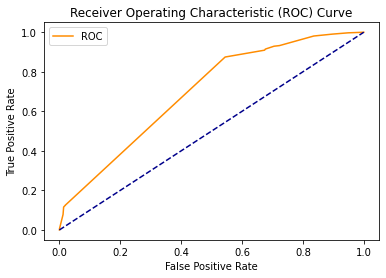

(AdaBoostClassifier(n_estimators=20, random_state=10),
 0.7835665746113507,
 0.5508722499137058,
 0.11942815780639648)

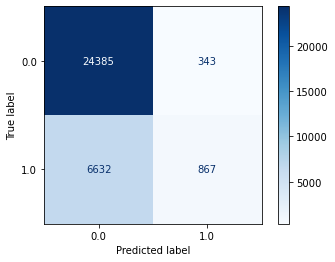

In [178]:
#Testing on model AdaBoostClassififer

run_pred(model_abc, X_test, y_test)

Accuracy = 0.6448319731901822
ROC Area under Curve = 0.5618346977699044
Time taken = 0.2869608402252197
              precision    recall  f1-score   support

         0.0    0.79939   0.71708   0.75600     24728
         1.0    0.30353   0.40659   0.34758      7499

    accuracy                        0.64483     32227
   macro avg    0.55146   0.56183   0.55179     32227
weighted avg    0.68401   0.64483   0.66096     32227



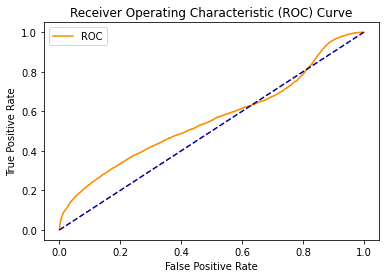

(VotingClassifier(estimators=[('LogisticRegression',
                               LogisticRegression(random_state=12345)),
                              ('DTree',
                               DecisionTreeClassifier(random_state=12345)),
                              ('GaussianNb', GaussianNB()),
                              ('MLPClassifier',
                               MLPClassifier(random_state=12345, verbose=0)),
                              ('AdaBoostClassifier',
                               AdaBoostClassifier(random_state=12345))],
                  voting='soft', weights=[1, 1, 1, 3, 1]),
 0.6448319731901822,
 0.5618346977699044,
 0.2869608402252197)

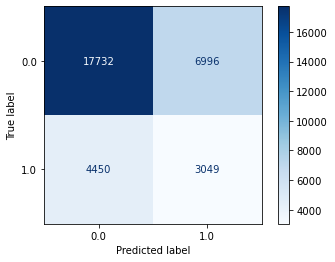

In [180]:
# Testing on Ensembled Model 

run_pred(voting_clf, X_test, y_test)

# Now, let us try same experiment by oversampling the imbalanced dataset and removing the outliers in the dataset and check if the accuracy of the models increases

## Feature Engineering

In [236]:
# Viewing training dataset

train_data = pd.read_csv('/Users/aryashrinu/Desktop/weather_aus_training_data.csv')
train_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [237]:
# "RainToday" and "RainTomorrow" features will be converted into binary (1/0)
# 1 represents "Yes"
# 0 represents "No"

train_data['RainToday'].replace({'Yes': 1, 'No': 0},inplace = True)
train_data['RainTomorrow'].replace({'Yes': 1, 'No': 0},inplace = True)

In [238]:
# Check if the text to numeric class label conversion is successful

train_data['RainTomorrow'].value_counts()/len(train_data)

0    0.778322
1    0.221678
Name: RainTomorrow, dtype: float64

In [239]:
#from imblearn.over_sampling import SMOTE 
#sm = SMOTE(random_state = 42) 
#X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
#train_data['RainTomorrow'].value_counts()/len(train_data)

In [240]:
# Tried SMOTE to handle the imbalanced dataset. Since the result is not accurate, we will try the resample method for the same.

In [241]:
# Balancing the class imbalance in 'RainTomorrow' feature by doing oversampling 

no_response = train_data[train_data.RainTomorrow == 0]
yes_Response = train_data[train_data.RainTomorrow == 1]
yes_oversampled = resample(yes_Response, replace=True, n_samples=len(no_response), random_state=123)
oversampled_dataset = pd.concat([no_response, yes_oversampled])

In [242]:
# Checking the details of missing values
total_values = oversampled_dataset.isnull().sum().sort_values(ascending=False)
percentage = (oversampled_dataset.isnull().sum()/oversampled_dataset.isnull().count()).sort_values(ascending=False)
missing_value = pd.concat([total_values, percentage], axis=1, keys=['Total_Count', 'Percent_Value'])
missing_value.head(10)

,Total_Count,Percent_Value
Sunshine,76972,0.450994
Evaporation,71177,0.417040
Cloud3pm,64044,0.375246
Cloud9am,61968,0.363082
Pressure9am,16704,0.097872
Pressure3pm,16664,0.097638
WindGustDir,12579,0.073703
WindGustSpeed,12474,0.073088
WindDir9am,11743,0.068804
WindDir3pm,4608,0.026999


In [243]:
# The next step is to compute categorical columns with mode, and transform them into numerical values. Then, we will
# impute the missing values using MICE Package

In [244]:
oversampled_dataset.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [245]:
# Compute categorical var with Mode
oversampled_dataset['Date'] = oversampled_dataset['Date'].fillna(oversampled_dataset['Date'].mode()[0])
oversampled_dataset['Location'] = oversampled_dataset['Location'].fillna(oversampled_dataset['Location'].mode()[0])
oversampled_dataset['WindGustDir'] = oversampled_dataset['WindGustDir'].fillna(oversampled_dataset['WindGustDir'].mode()[0])
oversampled_dataset['WindDir9am'] = oversampled_dataset['WindDir9am'].fillna(oversampled_dataset['WindDir9am'].mode()[0])
oversampled_dataset['WindDir3pm'] = oversampled_dataset['WindDir3pm'].fillna(oversampled_dataset['WindDir3pm'].mode()[0])

In [246]:
# Convert categorical features to continuous features with Label Encoding
labelencoders = {}
for column in oversampled_dataset.select_dtypes(include=['object']).columns:
    labelencoders[column] = LabelEncoder()
    oversampled_dataset[column] = labelencoders[column].fit_transform(oversampled_dataset[column])

In [247]:
# Multiple Imputation by Chained Equations
MiceImputedValue = oversampled_dataset.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputedValue.iloc[:, :] = mice_imputer.fit_transform(oversampled_dataset)

In [248]:
#Viewing the Mice Imputations
MiceImputedValue.head()
MiceImputedValue['RainTomorrow'].value_counts()/len(train_data)

1.0    0.778322
0.0    0.778322
Name: RainTomorrow, dtype: float64

In [249]:
# Next step is to check of the NAN Values are imputed completely or not
MiceImputedValue.isna()
# The NAN values are removed completely

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74443,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [250]:
# InterQuartileRange is used to detect the outliers from the MiceImputed data
Q1 = MiceImputedValue.quantile(0.25)
Q3 = MiceImputedValue.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1367.000000
Location           25.000000
MinTemp             9.200000
MaxTemp            10.300000
Rainfall            2.400000
Evaporation         4.200000
Sunshine            5.978490
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.220252
Pressure9am         8.900000
Pressure3pm         8.900000
Cloud9am            4.000000
Cloud3pm            3.742909
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [251]:
# Removing outliers from dataset
MiceImputedValue = MiceImputedValue[~((MiceImputedValue < (Q1 - 1.5 * IQR)) |(MiceImputedValue > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputedValue.shape

(121798, 24)

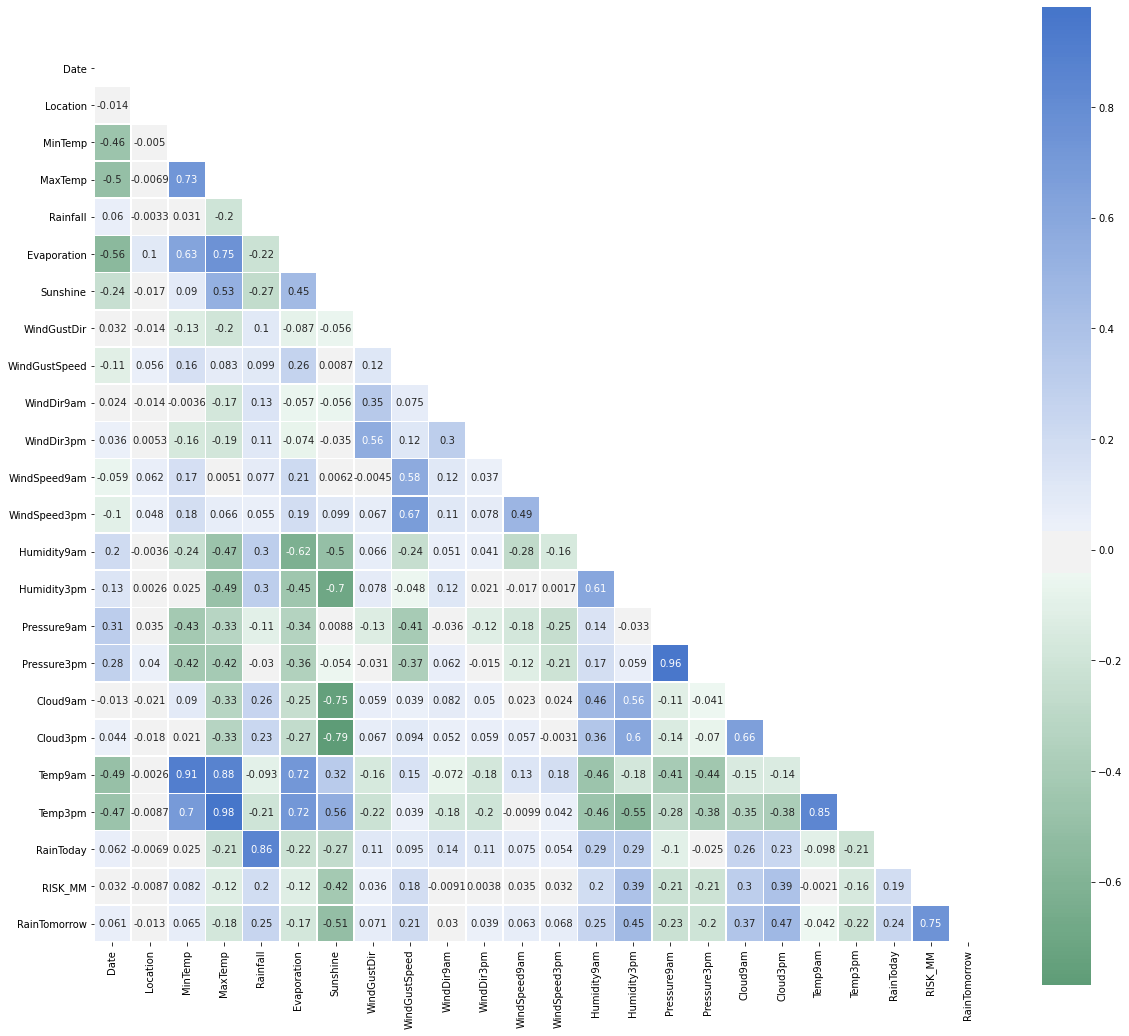

In [252]:
# Now the training dataset is free from outliers. Next step is to check if any feature is correlated highly with any other feature

# Correlation Heatmap
correlation = MiceImputedValue.corr()
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(140, 255, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

## Findings

### Some of the pairs that have correlation are: Pressure9am and  Presssure3pm, Temp9am and Temp3pm, etc.

### Since none of the variables have same correlation, we are not discarding any features as every feature might add value to the training.

## Feature Selection

In [253]:
# Feature Selection by Filter Method(Chi-Square Value):
# Standardize the data using MinMaxScaler instead of StandardScaler to avoid negative values

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputedValue)
modified_data_entries = pd.DataFrame(r_scaler.transform(MiceImputedValue), index=MiceImputedValue.index, columns=MiceImputedValue.columns)
modified_data_entries.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.257958,0.041667,0.529139,0.510949,0.436283,0.574660,0.502345,0.866667,0.521127,0.866667,...,0.236065,0.247887,0.295775,0.840706,0.437272,0.500675,0.525269,0.241069,0.000000,0.0
1,0.290157,0.041667,0.362918,0.564477,0.373648,0.582396,0.736238,0.933333,0.521127,0.400000,...,0.265221,0.329577,0.315493,0.344824,0.244689,0.508751,0.589077,0.241069,0.000000,0.0
2,0.322356,0.041667,0.515288,0.579075,0.373648,0.695231,0.779438,1.000000,0.549296,0.866667,...,0.313815,0.245070,0.340845,0.338000,0.178518,0.611039,0.561001,0.241069,0.000000,0.0
3,0.331138,0.041667,0.412784,0.635036,0.373648,0.599354,0.750517,0.266667,0.239437,0.600000,...,0.177752,0.526761,0.456338,0.299553,0.204695,0.532977,0.645228,0.241069,0.076923,0.0
4,0.334065,0.041667,0.642724,0.739659,0.478040,0.621780,0.393971,0.866667,0.478873,0.066667,...,0.342971,0.335211,0.264789,0.756704,0.714072,0.524902,0.726902,0.241069,0.015385,0.0


In [254]:
# Feature Importance using Filter Method (Chi-Square)

X = modified_data_entries.loc[:,modified_data_entries.columns!='RainTomorrow']
y = modified_data_entries[['RainTomorrow']]
selector = SelectKBest(chi2, k=11)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


In [255]:
# To double check the above, we will check if other variables has low feature importance compared to RISK_MM with respect
# to the target variable

permutation = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(permutation, feature_names = X.columns.tolist())

Weight,Feature
0.4761 ± 0.0013,RISK_MM
0 ± 0.0000,MaxTemp
0 ± 0.0000,Rainfall
0 ± 0.0000,Evaporation
0 ± 0.0000,Sunshine
0 ± 0.0000,WindGustDir
0 ± 0.0000,WindGustSpeed
0 ± 0.0000,WindDir9am
0 ± 0.0000,WindDir3pm
0 ± 0.0000,Cloud3pm


In [256]:
# From the above, it is proved that RISK_MM has the highest feature importance with respect to the 
# target variable, so it is good to drop(not consider) that variable when constructing models

In [269]:
# Training with different models

features = MiceImputedValue[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']]
target = MiceImputedValue['RainTomorrow']

# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [270]:
def plot_roc_curve(fpos, tpos):  
    plt.plot(fpos, tpos, color='darkorange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [271]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report
def run_stats_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fpos, tpos, thresholds = roc_curve(y_test, probs) 
    plot_roc_curve(fpos, tpos)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = None)
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.7762889983579638
ROC Area under Curve = 0.7563028560477105
Time taken = 0.28353190422058105
              precision    recall  f1-score   support

         0.0    0.79722   0.84823   0.82194     18535
         1.0    0.73781   0.66437   0.69917     11915

    accuracy                        0.77629     30450
   macro avg    0.76752   0.75630   0.76055     30450
weighted avg    0.77398   0.77629   0.77390     30450



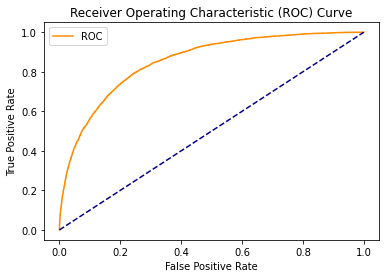

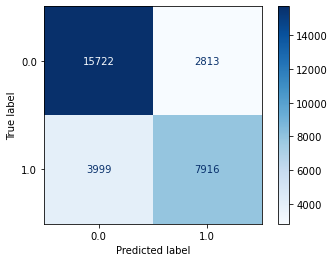

In [272]:
# Model 1 - Logistic Regression 

params_lr = {'penalty': 'l2','solver':'liblinear','multi_class':'ovr'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_stats_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.7541543513957307
ROC Area under Curve = 0.7277194216157272
Time taken = 0.13956379890441895
              precision    recall  f1-score   support

         0.0    0.77034   0.84931   0.80790     18535
         1.0    0.72112   0.60613   0.65864     11915

    accuracy                        0.75415     30450
   macro avg    0.74573   0.72772   0.73327     30450
weighted avg    0.75108   0.75415   0.74950     30450



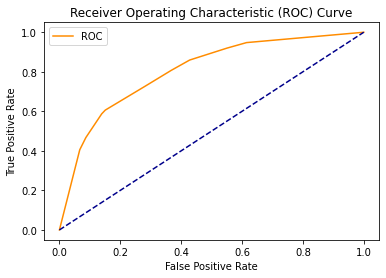

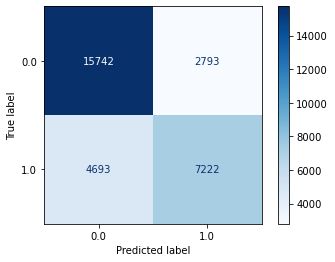

In [276]:
# Model 2 - Decision Tree

params_dt = {'max_depth': 32,
             'max_features': "log2",
             'max_leaf_nodes':10}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_stats_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.7463382594417077
ROC Area under Curve = 0.7384153399320178
Time taken = 0.07160401344299316
              precision    recall  f1-score   support

         0.0    0.80176   0.77486   0.78808     18535
         1.0    0.66715   0.70197   0.68412     11915

    accuracy                        0.74634     30450
   macro avg    0.73445   0.73842   0.73610     30450
weighted avg    0.74909   0.74634   0.74740     30450



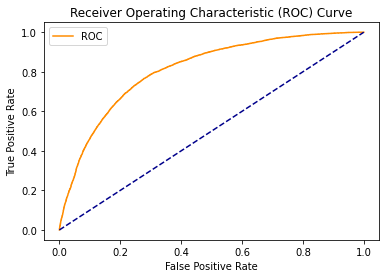

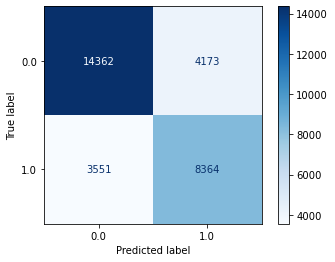

In [277]:
# Model 3 - Gaussian Naive Bayes

params_gnb = {'var_smoothing': 1e-9}
model_gnb = GaussianNB(**params_gnb)
model_gnb, accuracy_gnb, roc_auc_gnb, tt_gnb = run_stats_model(model_gnb, X_train, y_train, X_test, y_test)

Accuracy = 0.8442692939244664
ROC Area under Curve = 0.8345500980837084
Time taken = 95.07117080688477
              precision    recall  f1-score   support

         0.0    0.86682   0.87926   0.87299     18535
         1.0    0.80788   0.78984   0.79876     11915

    accuracy                        0.84427     30450
   macro avg    0.83735   0.83455   0.83588     30450
weighted avg    0.84375   0.84427   0.84395     30450



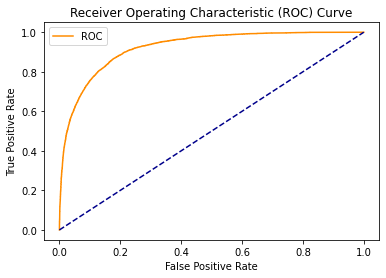

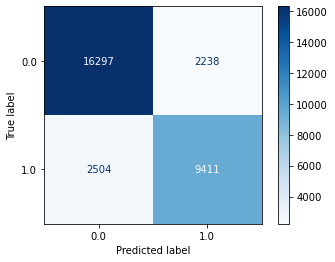

In [275]:
# Model 4 - Neural Network (Multilayer Perceptron)

params_nn = {'hidden_layer_sizes': (25,25,25),
             'activation': 'relu',
             'solver': 'lbfgs',
             'max_iter': 500,
             'batch_size' : 10}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_stats_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.7779310344827586
ROC Area under Curve = 0.7634669684475991
Time taken = 1.8277409076690674
              precision    recall  f1-score   support

         0.0    0.80990   0.83000   0.81982     18535
         1.0    0.72492   0.69694   0.71065     11915

    accuracy                        0.77793     30450
   macro avg    0.76741   0.76347   0.76524     30450
weighted avg    0.77665   0.77793   0.77711     30450



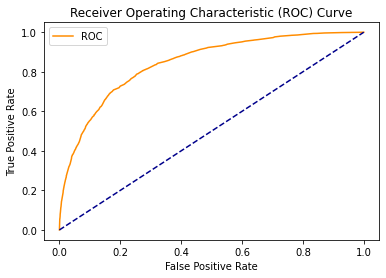

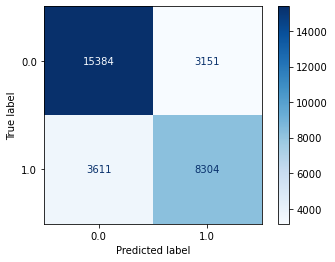

In [278]:
#Model 5 - AdaBoostClassifier

params_abc = {'n_estimators' : 20,
               'random_state' : 10
             }

model_abc = AdaBoostClassifier(**params_abc)
model_abc, accuracy_abc, roc_auc_abc, tt_abc = run_stats_model(model_abc, X_train, y_train, X_test, y_test)

In [279]:
# Applying 5 - fold cross validation for the decision tree model

# Applying 5-Fold Cross Validation

scores = cross_val_score(model_nn, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84466338 0.83979201 0.83814997 0.8432317  0.84684438]


In [280]:
# Find the Average Cross - Validation Score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8425


In [281]:
# From the above, CV does not improve the accuracy of the model. The Neural Network(MultiLayerPerceptron) has an accuracy
# of 84.42% whereas the Cross Vlaidation score for the same is 84.25%. Based on the above, Neural Network(Multi
# LayerPerceptron) performs the best. 

In [282]:
# We are taking all the above methods into consideration for Ensemble learning since the accuracy for all the models is 
# greater than 50% (more than a coin filp)
# Trying Ensemble methods for the above classification models
# We are using soft voting method and the vote is higher for Neural Network(MultiLayerPerceptron) since it gives a 
# higher accuracy compared to other methods


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss


clf1 = LogisticRegression(random_state=12345)
clf2 = DecisionTreeClassifier(random_state=12345)
clf3 = GaussianNB()
clf4 = MLPClassifier(random_state=12345, verbose = 0)
clf5 = AdaBoostClassifier(random_state=12345)

voting_clf = VotingClassifier(estimators=[('LogisticRegression', clf1), ('DTree', clf2), ('GaussianNb', clf3), 
                                          ('MLPClassifier', clf4), ('AdaBoostClassifier', clf5)], weights=[1, 1, 1, 3, 1], voting='soft')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)
acc = accuracy_score(y_test, preds)
l_loss = log_loss(y_test, preds)
f1 = f1_score(y_test, preds)

print("Accuracy is: " + str(acc))
print("Log Loss is: " + str(l_loss))
print("F1 Score is: " + str(f1))

Accuracy is: 0.8615106732348111
Log Loss is: 4.7833049866450645
F1 Score is: 0.8217440926575643


In [ ]:
# From the above, the ensemble output of 86.15 % accuracy is slightly better than the accuracy of Neural Network(Multi
# LayerPerceptron) which is 84.42%.
# For the oversamplied dataset with outlier removal, ensembled output is better compared to the individual models

# Testing using the safe dataset

In [174]:
# Feature engineering the safe dataset

test_data = pd.read_csv('/Users/aryashrinu/Desktop/weather_aus_testing_data.csv')
test_data.head(10)

test_data['RainToday'].replace({'Yes': 1, 'No': 0},inplace = True)
test_data['RainTomorrow'].replace({'Yes': 1, 'No': 0},inplace = True)
test_data.select_dtypes(include=['object']).columns

no_response = test_data[test_data.RainTomorrow == 0]
yes_Response = test_data[test_data.RainTomorrow == 1]
yes_oversampled = resample(yes_Response, replace=True, n_samples=len(no_response), random_state=123)
oversampled_dataset = pd.concat([no_response, yes_oversampled])

total_values = oversampled_dataset.isnull().sum().sort_values(ascending=False)
percentage = (oversampled_dataset.isnull().sum()/oversampled_dataset.isnull().count()).sort_values(ascending=False)
missing_value = pd.concat([total_values, percentage], axis=1, keys=['Total_Count', 'Percent_Value'])

oversampled_dataset['Date'] = oversampled_dataset['Date'].fillna(oversampled_dataset['Date'].mode()[0])
oversampled_dataset['Location'] = oversampled_dataset['Location'].fillna(oversampled_dataset['Location'].mode()[0])
oversampled_dataset['WindGustDir'] = oversampled_dataset['WindGustDir'].fillna(oversampled_dataset['WindGustDir'].mode()[0])
oversampled_dataset['WindDir9am'] = oversampled_dataset['WindDir9am'].fillna(oversampled_dataset['WindDir9am'].mode()[0])
oversampled_dataset['WindDir3pm'] = oversampled_dataset['WindDir3pm'].fillna(oversampled_dataset['WindDir3pm'].mode()[0])

labelencoders = {}
for column in oversampled_dataset.select_dtypes(include=['object']).columns:
    labelencoders[column] = LabelEncoder()
    oversampled_dataset[column] = labelencoders[column].fit_transform(oversampled_dataset[column])


MiceImputedValue = oversampled_dataset.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputedValue.iloc[:, :] = mice_imputer.fit_transform(oversampled_dataset)

Q1 = MiceImputedValue.quantile(0.25)
Q3 = MiceImputedValue.quantile(0.75)
IQR = Q3 - Q1

MiceImputedValue = MiceImputedValue[~((MiceImputedValue < (Q1 - 1.5 * IQR)) |(MiceImputedValue > (Q3 + 1.5 * IQR))).any(axis=1)]


r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputedValue)
modified_data_entries = pd.DataFrame(r_scaler.transform(MiceImputedValue), index=MiceImputedValue.index, columns=MiceImputedValue.columns)


test_features = MiceImputedValue[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']]
test_target = MiceImputedValue['RainTomorrow']

alpha, X_test, beta, y_test = train_test_split(test_features, test_target, test_size=0.99, random_state=12345)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [283]:
# Feature engineering the safe dataset

test_data = pd.read_csv('/Users/aryashrinu/Desktop/weather_aus_testing_data.csv')
test_data.head(10)

test_data['RainToday'].replace({'Yes': 1, 'No': 0},inplace = True)
test_data['RainTomorrow'].replace({'Yes': 1, 'No': 0},inplace = True)
test_data.select_dtypes(include=['object']).columns

test_data['Date'] = test_data['Date'].fillna(test_data['Date'].mode()[0])
test_data['Location'] = test_data['Location'].fillna(test_data['Location'].mode()[0])
test_data['WindGustDir'] = test_data['WindGustDir'].fillna(test_data['WindGustDir'].mode()[0])
test_data['WindDir9am'] = test_data['WindDir9am'].fillna(test_data['WindDir9am'].mode()[0])
test_data['WindDir3pm'] = test_data['WindDir3pm'].fillna(test_data['WindDir3pm'].mode()[0])    
    
labelencoders = {}
for column in test_data.select_dtypes(include=['object']).columns:
    labelencoders[column] = LabelEncoder()
    test_data[column] = labelencoders[column].fit_transform(test_data[column])
    
test_data.fillna(test_data.mean(), inplace=True)

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(test_data)

test_data = pd.DataFrame(r_scaler.transform(test_data), index=test_data.index, columns=test_data.columns)

test_features = test_data[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']]
test_target =   test_data['RainTomorrow']


# Split into test and train

alpha, X_test, beta, y_test = train_test_split(test_features, test_target, test_size=0.99, random_state=12345)

Accuracy = 0.7810221243057064
ROC Area under Curve = 0.5318862853664647
Time taken = 0.022693872451782227
              precision    recall  f1-score   support

         0.0    0.77889   0.99790   0.87490     24728
         1.0    0.90476   0.06588   0.12281      7499

    accuracy                        0.78102     32227
   macro avg    0.84183   0.53189   0.49885     32227
weighted avg    0.80818   0.78102   0.69989     32227



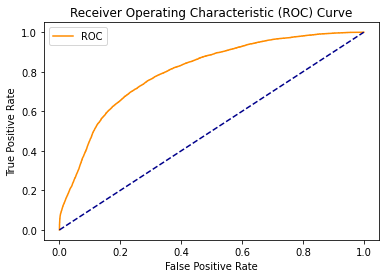

(LogisticRegression(multi_class='ovr', solver='liblinear'),
 0.7810221243057064,
 0.5318862853664647,
 0.022693872451782227)

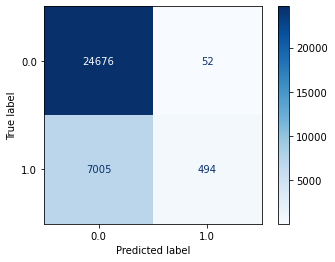

In [284]:
# Testing on LogisticRegression Model
run_pred(model_lr, X_test, y_test)

Accuracy = 0.7718062494181898
ROC Area under Curve = 0.5236046246908194
Time taken = 0.025400161743164062
              precision    recall  f1-score   support

         0.0    0.77594   0.98787   0.86917     24728
         1.0    0.59732   0.05934   0.10796      7499

    accuracy                        0.77181     32227
   macro avg    0.68663   0.52360   0.48856     32227
weighted avg    0.73437   0.77181   0.69204     32227



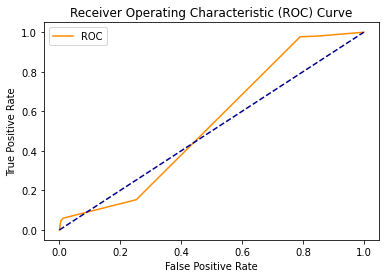

(DecisionTreeClassifier(max_depth=32, max_features='log2', max_leaf_nodes=10),
 0.7718062494181898,
 0.5236046246908194,
 0.025400161743164062)

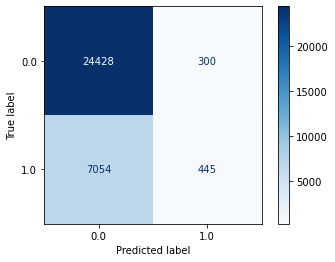

In [285]:
# Testing on Decision Tree Classifier
run_pred(model_dt, X_test, y_test)

Accuracy = 0.7883451764048779
ROC Area under Curve = 0.7110988436978699
Time taken = 0.02954888343811035
              precision    recall  f1-score   support

         0.0    0.86684   0.85559   0.86118     24728
         1.0    0.54335   0.56661   0.55474      7499

    accuracy                        0.78835     32227
   macro avg    0.70510   0.71110   0.70796     32227
weighted avg    0.79157   0.78835   0.78987     32227



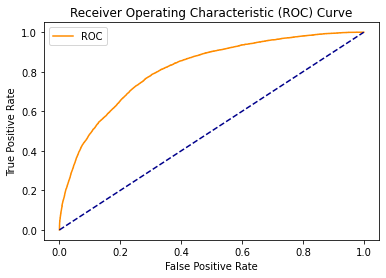

(GaussianNB(), 0.7883451764048779, 0.7110988436978699, 0.02954888343811035)

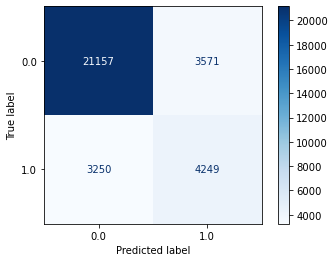

In [286]:
# Testing on GaussianNaiveBayes
run_pred(model_gnb, X_test, y_test)

Accuracy = 0.506811059049865
ROC Area under Curve = 0.5823674958666979
Time taken = 0.06673192977905273
              precision    recall  f1-score   support

         0.0    0.84035   0.44104   0.57848     24728
         1.0    0.28194   0.72370   0.40579      7499

    accuracy                        0.50681     32227
   macro avg    0.56114   0.58237   0.49213     32227
weighted avg    0.71041   0.50681   0.53829     32227



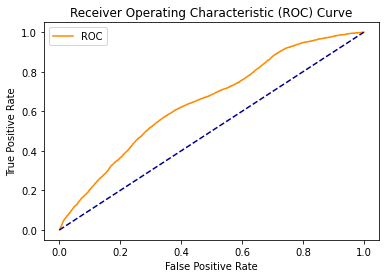

(MLPClassifier(batch_size=10, hidden_layer_sizes=(25, 25, 25), max_iter=500,
               solver='lbfgs'),
 0.506811059049865,
 0.5823674958666979,
 0.06673192977905273)

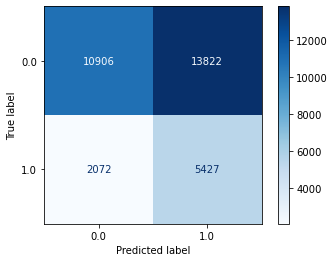

In [287]:
# Testing on Neural Networks (MultiLayerPerceptron)
run_pred(model_nn, X_test, y_test)

Accuracy = 0.4555496943556645
ROC Area under Curve = 0.5996470860193199
Time taken = 0.11159801483154297
              precision    recall  f1-score   support

         0.0    0.89272   0.33011   0.48199     24728
         1.0    0.28237   0.86918   0.42626      7499

    accuracy                        0.45555     32227
   macro avg    0.58754   0.59965   0.45413     32227
weighted avg    0.75069   0.45555   0.46902     32227



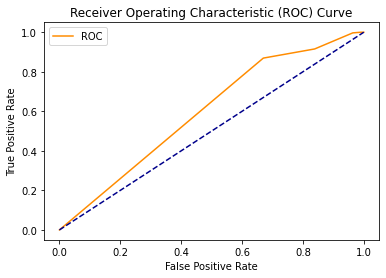

(AdaBoostClassifier(n_estimators=20, random_state=10),
 0.4555496943556645,
 0.5996470860193199,
 0.11159801483154297)

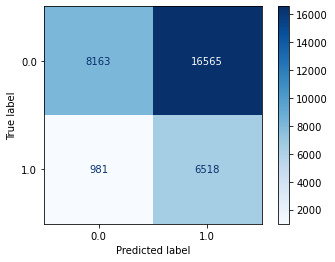

In [288]:
# Testing on AdaBoostClassifier
run_pred(model_abc, X_test, y_test)

Accuracy = 0.8117526477622139
ROC Area under Curve = 0.7894546349012256
Time taken = 0.31829190254211426
              precision    recall  f1-score   support

         0.0    0.81684   0.89106   0.85234     21416
         1.0    0.80165   0.68785   0.74040     13708

    accuracy                        0.81175     35124
   macro avg    0.80924   0.78945   0.79637     35124
weighted avg    0.81091   0.81175   0.80865     35124



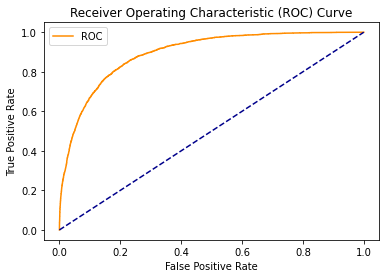

(VotingClassifier(estimators=[('LogisticRegression',
                               LogisticRegression(random_state=12345)),
                              ('DTree',
                               DecisionTreeClassifier(random_state=12345)),
                              ('GaussianNb', GaussianNB()),
                              ('MLPClassifier',
                               MLPClassifier(random_state=12345, verbose=0)),
                              ('AdaBoostClassifier',
                               AdaBoostClassifier(random_state=12345))],
                  voting='soft', weights=[1, 1, 1, 3, 1]),
 0.8117526477622139,
 0.7894546349012256,
 0.31829190254211426)

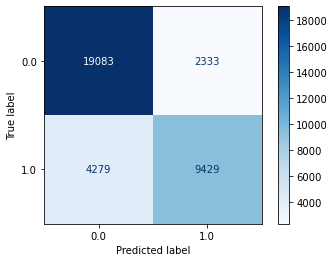

In [180]:
# Testing on Ensembled Model
run_pred(voting_clf, X_test, y_test)

# Observations - 

## Since the dataset is different now with oversampling and removing outliers, the model behaved differently with varied hyperparameters than the one used for dataset without oversampling and removing outliers



# References
## https://www.kaggle.com/
## https://scikit-learn.org/stable/